## ReadMe
1. Run all the modules 
2. **don't be scared if P2() returns an error, it's normal** (P2 was placed there to minimize the effort of scrolling after changing the parameters)
3. Change the parameters as you wish (intructions how to bellow)
4. Run P1 and analyze the results
5. Repeat steps 3 and 4 how many times you would like to


**Note:
The function EASingleObjective is the one that does all the work regarding the evolution. The function P1 only calls EASingleObjective multiple times, saves and print the results. Some adicional functions are hidden in a py file called auxfunctionsP2MultipleObjective. For further inspection open the file and analyze it**

# Imports 

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from deap import base, creator, tools
from pygmo import hypervolume as hv

#file generated by us that has the functions created by us 
from auxfunctionsP2MultipleObjective import * 
from auxfunctionsP1SingleObjective import invmutTSP

# Read files 

In [3]:
CustDist_WHCentral = pd.read_csv("CustDist_WHCentral.csv", sep=",", decimal=".")
del CustDist_WHCentral["Distances between Customers and Warehouse"]
CustDist_WHCentral_list = CustDist_WHCentral.values.tolist()

CustDist_WHCorner = pd.read_csv("CustDist_WHCorner.csv", sep=",", decimal=".")
del CustDist_WHCorner["Distances between Customers and Warehouse"]
CustDist_WHCorner_list = CustDist_WHCorner.values.tolist()

CustOrd = pd.read_csv("CustOrd.csv", sep=",", decimal=".")
del CustOrd["Customer"]
CustOrd_list = CustOrd.values.tolist()

CustPos_WHCentral = pd.read_csv("CustXY_WHCentral.csv", sep=",", decimal=".")
del CustPos_WHCentral["Customer XY"]
CustPos_WHCentral_list = CustPos_WHCentral.values.tolist()

CustPos_WHCorner = pd.read_csv("CustXY_WHCorner.csv", sep=",", decimal=".")
del CustPos_WHCorner["Customer XY"]
CustPos_WHCorner_list = CustPos_WHCorner.values.tolist()

#  Change parameters of the execution of the program here 

### Fixed parameters 

In [4]:
#defined in the assignment 
Number_of_Evaluations = 10000

#define the number of iterations 
n_iterations = 1

#warehouse location
Warehouse_location = "Central"

#type of costs in deliveries
deliver_type = "variable"

### Variable parameters 

In [5]:
#options -> 50, 30, 10
Number_Customers = 50
#size of the population
Population_Size = 100

# CXPB  is the probability with which two individuals are crossed
CXPB = 0.9
# MUTPB is the probability for mutating an individual
MUTPB = 0.15

### Prints and number of iterations

In [6]:
#change to 1 if print you want prints 
prints = 2

# Run the program here

D:\Programas\Anaconda\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
D:\Programas\Anaconda\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


-- End of (successful) evolution --


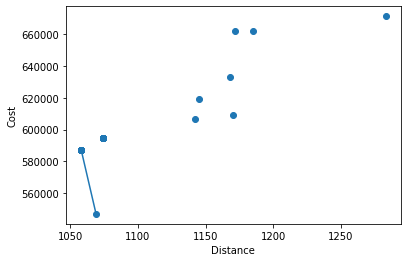

HyperVolume
Elemento com custo mínimo
[1069, 546880]
Elemento com a distância mínima
[1058, 587160]


In [21]:
P2()

In [20]:
def P2():

    #selects the file to be used with the costs 
    if(Warehouse_location == "Central"):
        CustDist = CustDist_WHCentral_list
        Coordinates = CustPos_WHCentral_list
     
    #selects the mode of the costs in deliveries 
    CustOrd = CustOrd_list
        
    #generates the final population
    final_pop = []
    
    #iterate over a previous defined number of iterations 
    for i in range(n_iterations):
        seed = random.randint(1, 100000) 
        final_pop = EAMultipleObjective(Number_Customers, Population_Size, 
                                         Number_of_Evaluations, seed, CustDist, CustOrd)
    
    
    x = []
    y = []
    
    
    
    for i in range(Number_Customers):
        x.append(MO_evaluatecostvariable(final_pop[i], CustDist, CustOrd)[0])
        y.append(MO_evaluatecostvariable(final_pop[i], CustDist, CustOrd)[1])

    pareto_front = plot_pareto_frontier(x, y, False, False)
    
    min_cost = 999999999999
    min_dist = 999999999999
    
    for i in range(len(pareto_front)):
        if pareto_front[i][1] < min_cost:
            aux_cost = pareto_front[i]
            min_cost = pareto_front[i][1]
        if pareto_front[i][0] < min_dist:
            aux_dist = pareto_front[i]
            min_dist = pareto_front[i][0]
    
    print("HyperVolume")
    print(hypervolume(final_pop))
    
    print("Elemento com custo mínimo")
    print(aux_cost)
    
    print("Elemento com a distância mínima")
    print(aux_dist)
        
    
    #gets the route and gives the visual representation 
    #final_route = get_route(results[min_index][0] ,CustOrd, Number_Customers)
    #plot_best_route_on_grid(final_route, Coordinates)
    
    return 

In [9]:
def EAMultipleObjective(Number_Customers, Population_Size, Number_of_Evaluations, seed, CustDist, CustOrd_list):
    
    creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()

    ## permutation setup for individual,
    toolbox.register("indices", \
                     random.sample, \
                     range(Number_Customers), 
                     Number_Customers)

    toolbox.register("individual", \
                     tools.initIterate, \
                     creator.Individual, toolbox.indices)

    ## population setup,
    toolbox.register("population", \
                     tools.initRepeat, \
                     list, toolbox.individual)

    #setup of the methods used in evolution
    toolbox.register("mate", tools.cxOrdered)
    toolbox.register("mutate", invmutTSP)
    toolbox.register("select", tools.selTournament, tournsize=5)
    
    #definition of the evaluation function
    toolbox.register("evaluate", MO_evaluatecostvariable)
    
    random.seed(seed)

    # create an initial population of n individuals (where
    # each individual is a list of indexes)
    pop = toolbox.population(n=Population_Size)
        
    if(prints == 1):
        print("Start of evolution")
    
    # Evaluate the entire population
    fitnesses = []
    for ind in pop:
        fitnesses.append(toolbox.evaluate(ind, CustDist, CustOrd_list))
    
    #fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
    
    if(prints == 1):    
        print("  Evaluated %i individuals" % len(pop))

    # Extracting all the fitnesses of
    fits = [ind.fitness.values[0] for ind in pop]

    # Variable keeping track of the number of generations
    g = 0
    arr_mean = []
    arr_min = []
    # Begin the evolution
    while g < Number_of_Evaluations/ Population_Size:
        # A new generation
        g = g + 1
        
        if(prints == 1):
            print("-- Generation %i --" % g)
        
        # Select the next generation individualspop
        offspring = toolbox.select(pop, len(pop))
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))
    
        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):

            # cross two individuals with probability CXPB
            if random.random() < CXPB:
                toolbox.mate(child1, child2)

                # fitness values of the children
                # must be recalculated later
                del child1.fitness.values
                del child2.fitness.values
        
        for mutant in offspring:

            # mutate an individual with probability MUTPB
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values
    
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = []
        for ind in invalid_ind:
            fitnesses.append(toolbox.evaluate(ind, CustDist, CustOrd_list))
        #fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
        
        if(prints == 1):
            print("  Evaluated %i individuals" % len(invalid_ind))
        
        # The population is entirely replaced by the offspring
        pop[:] = offspring
        
        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in pop]
        
        length = len(pop)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5
        
        if(prints == 1):
            print("  Min %s" % min(fits))
            print("  Max %s" % max(fits))
            print("  Avg %s" % mean)
            print("  Std %s" % std)

        arr_mean.append(mean)
        arr_min.append(min(fits))
    
    print("-- End of (successful) evolution --")
    
    best_ind = tools.selBest(pop, 1)[0]
    
    if(prints == 1):
        print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))
    
        x_coordinate = [i+1 for i in range(len(arr_mean))]
        plt.plot(x_coordinate, arr_mean, label = "Average")
        plt.plot(x_coordinate, arr_min, label = "Min")
        plt.title("Min and Average Fitness over generations")
        plt.legend()
        plt.grid()
        plt.figure()


    
    return pop